**Objetivo**

A partir de los datos que describen las casas en localidades de Boston se pretende generar una regresión lineal que permita predecir el valor medio de una casa en la misma localidad.

-------------------
##**Información de los Datos:**
-------------------
Cada registro describe un suburbio o pueblo de Boston. Los datos se extrajeron del Área Estadística Metropolitana Estándar de Boston (SMSA) en 1970.



Información de atributos (en orden):


- **tasa_crimen:** tasa de criminalidad per cápita por ciudad
- **prop_zonif:** proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
- **prop_acres_non_retail:** proporción de acres comerciales no minoristas por ciudad
- **rio_charles:** variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
- **concentracion_nox:** concentración de óxidos nítricos (partes por 10 millones)
- **prom_cuartos:** promedio de cuartos por vivienda
- **edad:** proporción de unidades ocupadas por propietarios construidas antes de 1940
- **dist_centros_empleo:** distancias ponderadas a cinco centros de empleo de Boston
- **ind_acces_autopista:** índice de accesibilidad a carreteras radiales
- **impuesto:** tasa de impuesto a la propiedad de valor total por cada 10,000 dólares
- **prop_maestro_alumno:** ratio alumno-profesor por localidad
- **porcent_estatus:** %estado inferior de la población
- **media_valor_casas_ocupadas:** valor medio de las viviendas ocupadas por sus propietarios en 1000 dólares

Importar librerías

In [ ]:
#Leer archivos
from google.colab import files

# Manipulación de datos
import numpy as np
import pandas as pd

#imputar valores vacíos
from sklearn.impute import KNNImputer

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

#  Regresión lineal
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Escalar los datos
from sklearn.preprocessing import MinMaxScaler

# Ignorar **advertencias**
import warnings
warnings.filterwarnings("ignore")

Cargar los datos y leerlos a un dataframe

In [ ]:
#carga de datos a google collab
cargar_datos = files.upload()

Saving datos_Boston.csv to datos_Boston.csv


In [ ]:
datos = pd.read_csv("datos_Boston.csv")

Inspeccionar los datos

In [ ]:
datos.head()

,tasa_crimen,prop_zonif,prop_acres_non_retail,rio_charles,concentracion_nox,prom_cuartos,edad,dist_centros_empleo,ind_acces_autopista,impuesto,prop_maestro_alumno,porcent_estatus,media_valor_casas_ocupadas
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# Información de los datos:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tasa_crimen                 506 non-null    float64
 1   prop_zonif                  506 non-null    float64
 2   prop_acres_non_retail       506 non-null    float64
 3   rio_charles                 506 non-null    int64  
 4   concentracion_nox           506 non-null    float64
 5   prom_cuartos                506 non-null    float64
 6   edad                        506 non-null    float64
 7   dist_centros_empleo         506 non-null    float64
 8   ind_acces_autopista         506 non-null    int64  
 9   impuesto                    506 non-null    int64  
 10  prop_maestro_alumno         506 non-null    float64
 11  porcent_estatus             506 non-null    float64
 12  media_valor_casas_ocupadas  506 non-null    float64
dtypes: float64(10), int64(3)
memory usa

Del set de datos: hay un total de 13 columnas con datos (incluyendo la  variable de respuesta) y un total de 506 filas, donde no hay valores faltantes.
- La variable "rio_charles" es de tipo dummy: sus valores son 0 o 1
- Las otras 11 variables son numéricas

## Anásis univariado y bivariado

**Análsis univariado**

Gráfico de barras de la variable categórica "rio_charles"

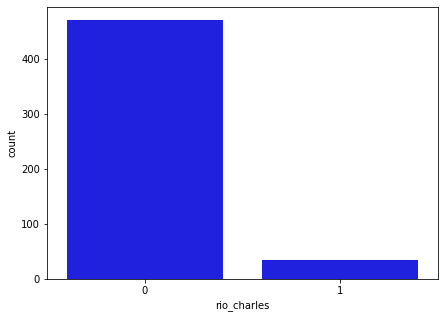

In [ ]:
# Gráfico de barras de "rio_charles"
figura, ejes = plt.subplots(figsize=(7, 5))
sns.countplot(x = "rio_charles", data = datos, color = "blue", order = datos["rio_charles"].value_counts().index)

Del gráfico se observa que la mayoría de las residencias del set de datos se encuentran alejadas del ríi Charles.

Ahora, la dstribución de las columnas numéricas

In [ ]:
#Primero creamos una lsita con los nombres da las columnas del set de datos, eliminando la variable dummy del "rio_charles"
cols_numericas = list(datos.columns)
del cols_numericas[3]

tasa_crimen


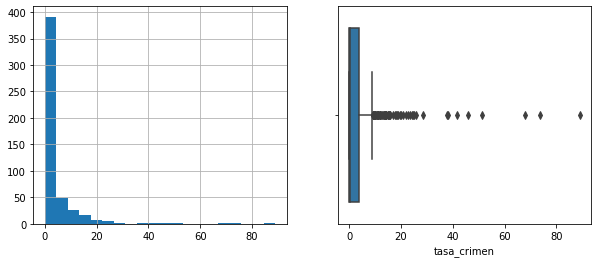

prop_zonif


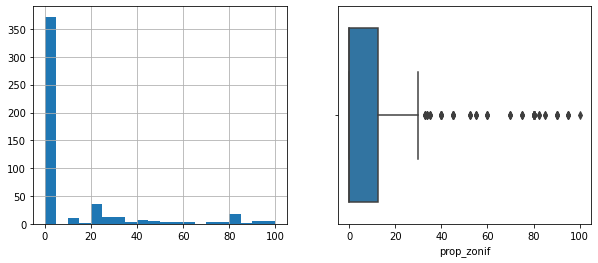

prop_acres_non_retail


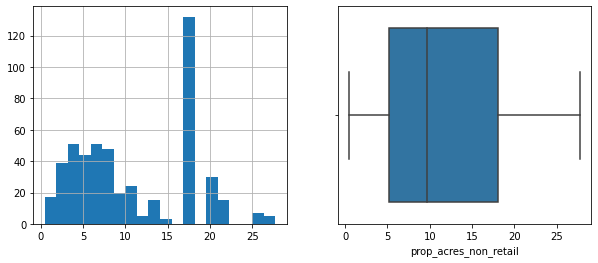

concentracion_nox


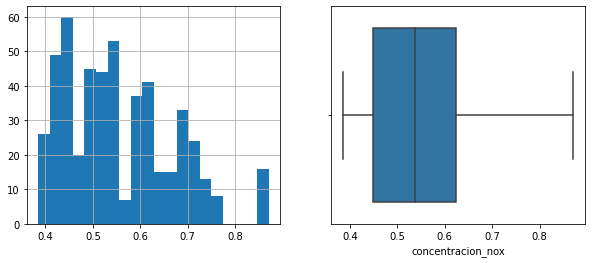

prom_cuartos


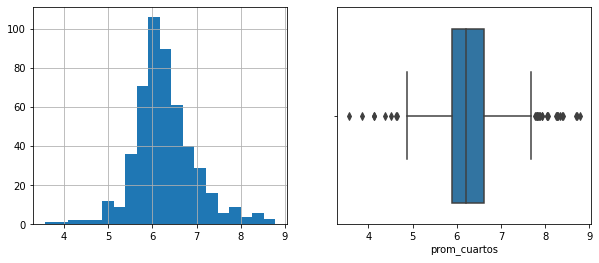

edad


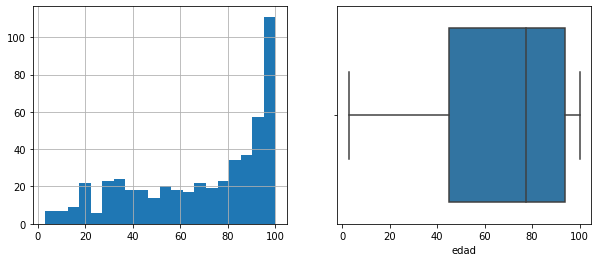

dist_centros_empleo


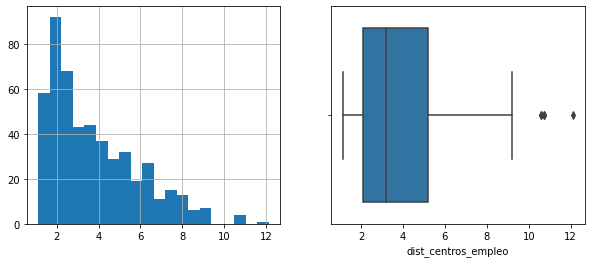

ind_acces_autopista


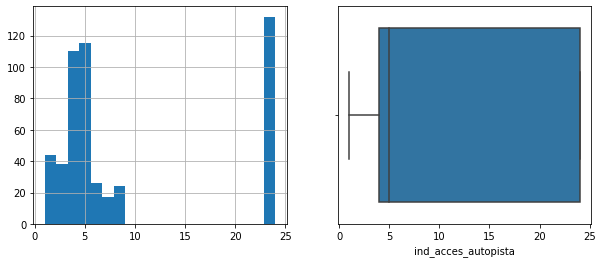

impuesto


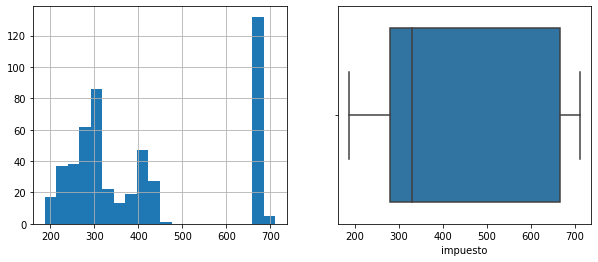

prop_maestro_alumno


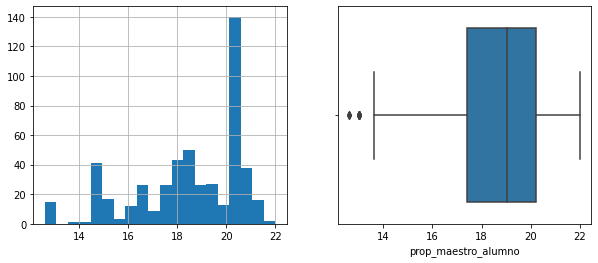

porcent_estatus


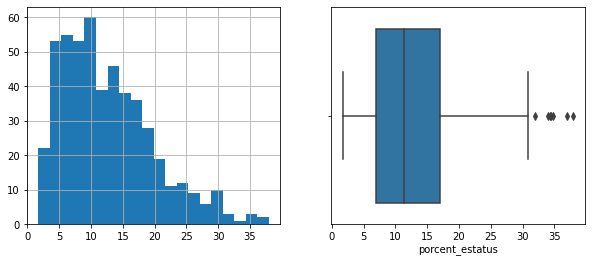

media_valor_casas_ocupadas


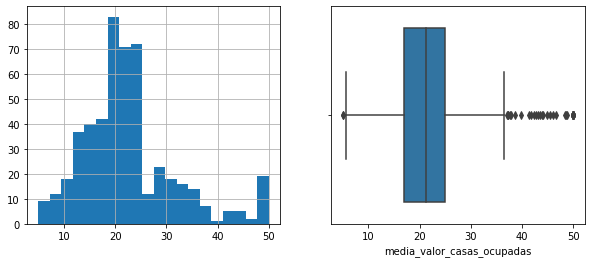

In [ ]:
# Se imprimen las distribuciones y   boxplot de las variables
for i in cols_numericas:
  print(i)
  plt.figure(figsize=(10,4))
  
  plt.subplot(1,2,1)
  datos[i].hist(bins = 20)
  
  plt.subplot(1,2,2)
  sns.boxplot(x = datos[i])
  
  plt.show()

**Observaciones:**


* Las variables "crimen" y "prop_zonif" tienen un sesgo positivo: Esto sugiere que la mayoría de las áreas tienen índices de criminalidad bajos y la mayoría de los terrenos residenciales están por debajo del área de 25,000 pies cuadrados.

* La distribución de la variable "edad" sugiere que muchas de las viviendas en el área  fueron construidas antes de 1940.


* La variable "dist_centros_empleo" tiene una distribución casi exponencial, lo que indica que la mayoría de las casas están más cerca de estos centros de empleo.


* Las variables "impuesto" y "ind_acces_autopista" tienen una distribución bimodal, lo que indica que la tasa del impuesto es posiblemente más alta para algunas propiedades que tienen un alto índice de accesibilidad a las carreteras radiales.


* La variable dependiente está sesgada a la derecha.

**Análsis bivariado**

A continuación, se grafica un *heatmap* de correlaciones, para visualizar si existen o no entre las distintas variables

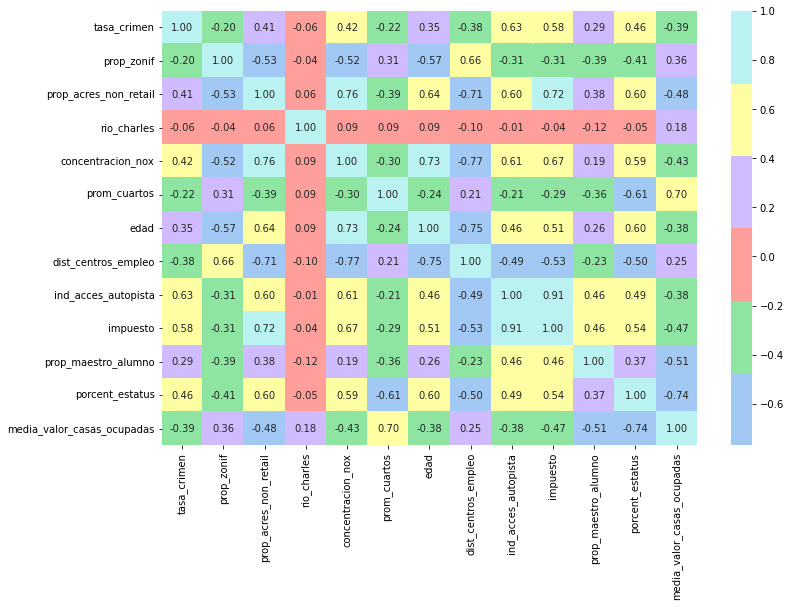

In [ ]:
plt.figure(figsize=(12,8))
#heatmap = sns.diverging_palette(230, 20, as_cmap = True)
color = sns.color_palette("pastel6")
sns.heatmap(datos.corr(), annot = True, fmt = '.2f', cmap = color)
plt.show()

**Observaciones:**



1. La variable "tasa_crimen" está correlacionada positivamente con: 


* La proporción de acres comerciales non-retail (prop_acres_non_retail)
, la concentración de óxidos nítricos (concentracion_nox), las unidades ocupadas por sus propietarios construidas antes de 1940 (edad), el índice de accesibilidad a las carreteras  (ind_acces_autopista), con "impuestos", el porcentaje del estatus bajo de la población (porcent_estatus).

* Esto significa una tasa de delincuencia más alta en áreas cercanas a las autopistas, que tienen una mayor concentración de óxido nítrico, y donde donde las casas son antiguas (construidas antes de 1940). 

* Por otro lado, está negativamente correlacionada con: la proporción de suelo residencial zonificado para lotes (prop_zonif), el número promedio de habitaciones (prom_cuartos): esto indica que hay menos delitos per cápita a medida que aumentan las zonas residenciales con lotes y las casas tienen mayor número de cuartos, es decir, zonas en desarrollo residencial con estabilidad y donde las casas son grandes.



2. La variable ZN está negativamente correlacionada con: 

* La proporción de acres comerciales non-retail (prop_acres_non_retail), concentración de óxidos nítricos (concentracion_nox), la proporción de unidades ocupadas construidas antes de 1940 (edad), el índice de accesibilidad a autopistas (ind_acces_autopista), el "impuesto", la proporción de alumnos por maestro (prop_maestro_alumno) y el porcentaje de estatus inferior de la población (porcent_estatus).

* Estas correlaciones tienen sentido ya que esta variable representa áreas residenciales extensas, por lo que se puede esperar que estas se ubiquen en la periferia de la ciudad, lo que las hace menos accesibles a carreteras radiales e industrias non-retail. Además, esto se correlaciona con una menor concentración de óxidos nítricos y una menor cantidad de casas de antes de 1940. Esto también indica una menor proporción de alumnos por maestro y una tasa de impuestos a la propiedad más baja. 

* La variable está positivamente relacionado con el número promedio de habitaciones por vivienda (prom_cuartos), la distancia ponderada a cinco centros de empleo de Boston (dist_centros_empleo) y el valor medio de las viviendas ocupadas (variable dependiente). De nuevo, estas relaciones entre las variables parecen tener sentido. Dado que en estos grandes lotes residenciales las casas ocupadas tienen un valor medio más alto, tiene sentido que tengan más habitaciones y, debido a la ubicación, estén más alejadas  de los centros de empleo.



3. La variable "prop_acres_non_retail" se correlaciona positivamente con: 

* La  concentración de óxidos nítricos (concentracion_nox), la proporción de unidades ocupadas construidas antes de 1940 (edad), la accesibilidad a las autopistas (ind_acces_autopista), el "impuesto", la proporción de alumnos por maestro (prop_maetro_alumnp), el porcentaje de la población de un estatus más bajo (porcent_estatus) y la tasa de criminalidad (tasa_crimen). 

* Esto tiene sentido, ya que en áreas donde hay negocios non-retail puede haber una mayor presencia de industrias, lo que aumenta la concentración de óxido nítrico. Por otro lado, aumenta el número de viviendas ocupadas construidas antes de 1940, cercanas a las carreteras radiales, donde los impuestos son altos. 

* Cuando la variable "prop_acres_non_retail" aumenta, se relaciona con que las casas tendrán menos habitaciones y estarán más cerca de los centros de trabajo. También indica que las viviendas ocupadas  tendrán un valor medio inferior.


4. El incremento de la variable "concentracion_nox" predice el incremento de viviendas construidas antes  de 1940 que están más cerca de las autopistas y tienen una tasa de impuesto más alta. También indica  un mayor porcentaje de la población que pertenece a un estatus más bajo y se relaciona  con la presencia de casas con menos habitaciones y un valor medio menor para las viviendas.

Se llama el método para calcular la correalción entre las dos variables que se grafican

In [ ]:
from scipy.stats import pearsonr

Gráficos entre las variables que presentan mayor correlación según el *heatmap* anterior

In [ ]:
# Función para scatterplot entre dos variables

def funcion_scatter(var1, var2, set_datos):
  plt.figure(figsize=(6, 6))
  sns.scatterplot(x = var1 , y = var2, data = set_datos)
  plt.show()

### Variable "tasa_crimen"

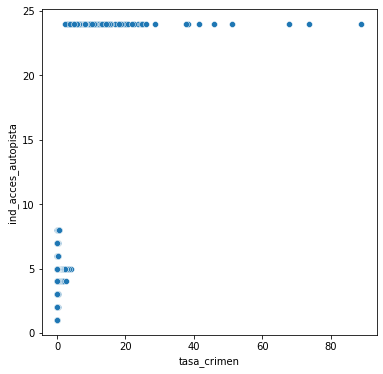

0.6255051452626023

In [ ]:
# Variables: "tasa_crimen", "ind_acces_autopista" 
funcion_scatter("tasa_crimen", "ind_acces_autopista", datos)
pearsonr(datos["tasa_crimen"], datos["ind_acces_autopista"])[0]

Entre estas dos variables no se aprecia una relación entre ambas variables

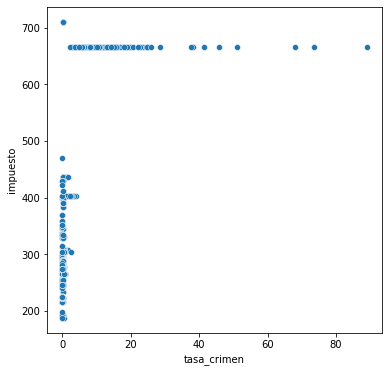

0.5827643120325852

In [ ]:
# Variables: "tasa_crimen", "impuesto" 
funcion_scatter("tasa_crimen", "impuesto", datos)
pearsonr(datos["tasa_crimen"], datos["impuesto"])[0]

Entre la tasa_crimen y el impuesto no parece existir una realación clara entre las variables, ya que para una tasa de criminalidad de 0, existe una gran variación de la variable impuesto, y para un impuesto elevado hay una gran variedad de tasas de crimen.

### Variable "prop_zonif"

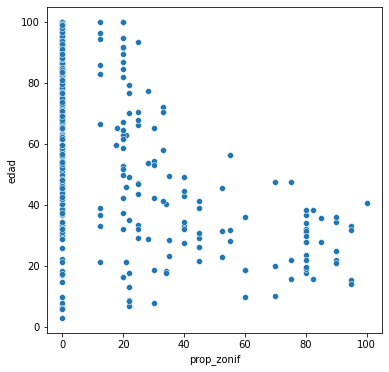

-0.5695373420992116

In [ ]:
# Variables: "prop_zonif", "edad" 
funcion_scatter("prop_zonif", "edad", datos)
pearsonr(datos["prop_zonif"], datos["edad"])[0]

Entre estas variables: edad y prop_zonif, tampoco parece existir una relación dado que los puntos están muy dispersos entre sí a partir del punto en el que se supera el valor de cero para porp_zonif, además, cuando es específicamente cero, hay puntos para prácticamente todo el rango de edades de las viviendas. 

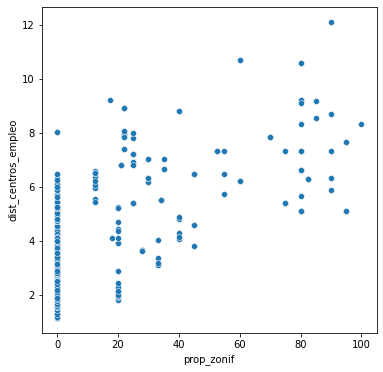

0.6644082227621102

In [ ]:
# Variables: "prop_zonif", "dist_centros_empleo" 
funcion_scatter("prop_zonif", "dist_centros_empleo", datos)
pearsonr(datos["prop_zonif"], datos["dist_centros_empleo"])[0]

Entre prop_zonif y la variable dist_centros_empleo no existe una relación dado el grado de dispersión de los datos, lo único apreciable es una tendencia de crecimiento de dist_centros_empleo a partir del punto en que pro_zonif supera el valor de cero.

### Variable "prop_acres_non_retail"

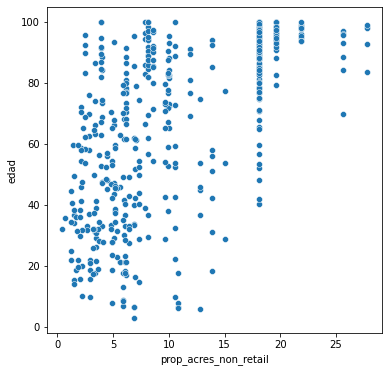

0.6447785113552555

In [ ]:
# Variables: "prop_acres_non_retail", "edad" 
funcion_scatter("prop_acres_non_retail", "edad", datos)
pearsonr(datos["prop_acres_non_retail"], datos["edad"])[0]

Entre las variables edad y prop_acres_non_retail no es posible establecer una relación a partir de lo que se observa en el gráfico.

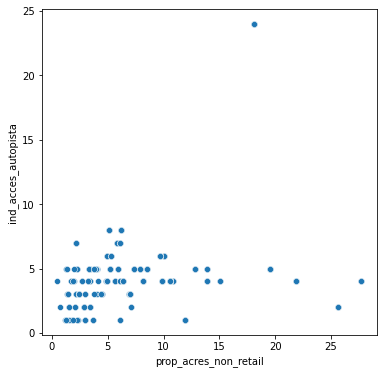

0.5951292746038483

In [ ]:
# Variables: "prop_acres_non_retail", "ind_acces_autopista" 
funcion_scatter("prop_acres_non_retail", "ind_acces_autopista", datos)
pearsonr(datos["prop_acres_non_retail"], datos["ind_acces_autopista"])[0]

Entre estas dos variables, prop_acces_non_retail e ind_acces_autopista no se observa una relación lineal, el coeficiente de correlación puede deberse a los puntos extremos en las variables.

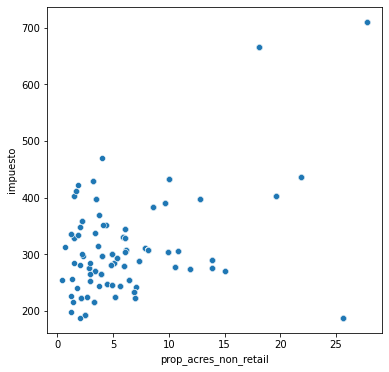

0.720760179951542

In [ ]:
# Variables: "prop_acres_non_retail", "impuesto" 
funcion_scatter("prop_acres_non_retail", "impuesto", datos)
pearsonr(datos["prop_acres_non_retail"], datos["impuesto"])[0]

En este gráfico de impuestos contra prop_acres_non_retail no se observa una relación, e igual que en el caso anterior, el coeficiente de correlación puede deberse a la presencia de valores extremos que se observan en el gráfico para valores altos de ambos features.

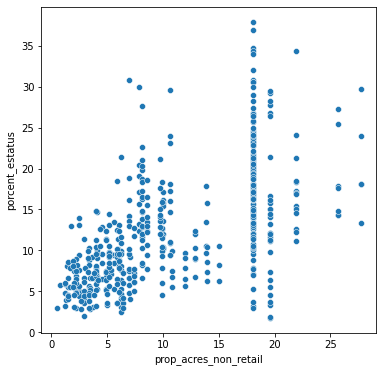

0.6037997164766215

In [ ]:
# Variables: "prop_acres_non_retail", "porcent_estatus" 
funcion_scatter("prop_acres_non_retail", "porcent_estatus", datos)
pearsonr(datos["prop_acres_non_retail"], datos["porcent_estatus"])[0]

Al graficar porcent_estatus contra prop_acres_non_retail, no se identifica una relación entre ambas, ya que los puntos son dispersos y para ciertos valores de la variables prop_acres_non_retail, parece abarcarse todo el rango de valores de la otra variable.

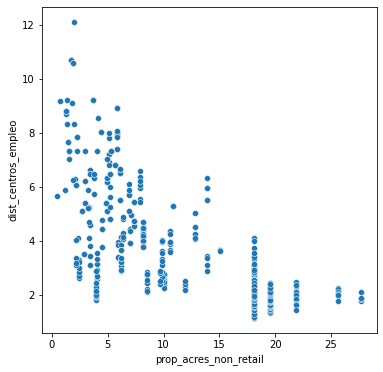

-0.7080269887427679

In [ ]:
# Variables: "prop_acres_non_retail", "dist_centros_empleo" 
funcion_scatter("prop_acres_non_retail", "dist_centros_empleo", datos)
pearsonr(datos["prop_acres_non_retail"], datos["dist_centros_empleo"])[0]

Si se revisa la correlación entre pro_acres_non_retail y dist_centros_empleos es negativa, a pesar de la dispersión de los datos. 

### Variable "concentracion_nox"

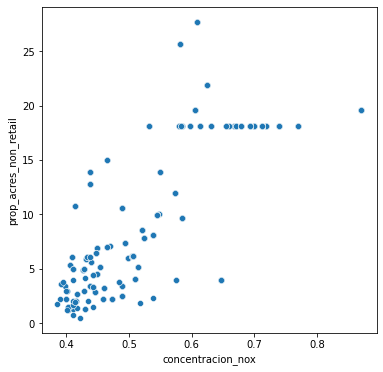

0.7636514469209151

In [ ]:
# Variables: "concentracion_nox", "prop_acres_non_retail" 
funcion_scatter("concentracion_nox", "prop_acres_non_retail", datos)
pearsonr(datos["concentracion_nox"], datos["prop_acres_non_retail"])[0]

Esto confirma una relación lineal positiva entre la proporción de negocios non-retail y la concentración de óxidos nítricos, como vimos en la matriz de correlación. Entonces, esto puede implicar que en áreas con menos negocios de este tipo hay más fábricas, lo que aumenta la concentración de óxido nítrico debido a las emisiones.

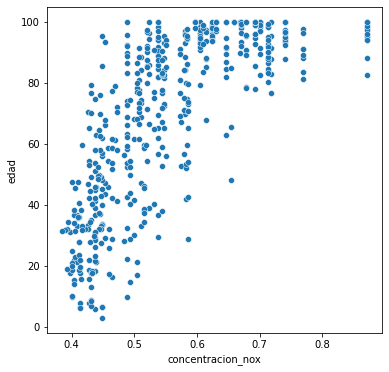

0.7314701037859584

In [ ]:
# Variables: "concentracion_nox", "edad" 
funcion_scatter("concentracion_nox", "edad", datos)
pearsonr(datos["concentracion_nox"], datos["edad"])[0]

Parece que la proporción más significativa de unidades ocupadas construidas antes de 1940 están ubicadas en áreas con una alta concentración de óxidos nítricos.

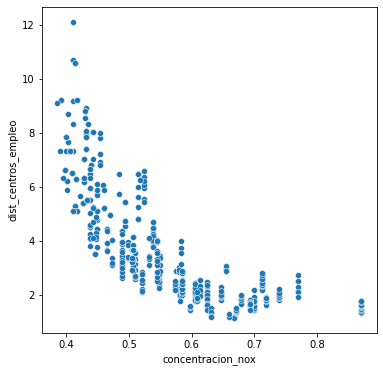

-0.7692301132258277

In [ ]:
# Variables: "concentracion_nox", "dist_centros_empleo" 
funcion_scatter("concentracion_nox", "dist_centros_empleo", datos)
pearsonr(datos["concentracion_nox"], datos["dist_centros_empleo"])[0]

Según el gráfico, mientras mayor sea la distancia a los centros de empleo, menor es el nivel de concentración de óxidos nítricos. 

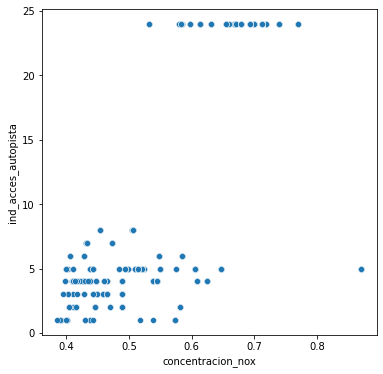

0.611440563485578

In [ ]:
# Variables: "concentracion_nox", "ind_acces_autopista" 
funcion_scatter("concentracion_nox", "ind_acces_autopista", datos)
pearsonr(datos["concentracion_nox"], datos["ind_acces_autopista"])[0]

A pesar de la alta correlación entre estas dos variables, no parece existir una relación clara entre ambas.

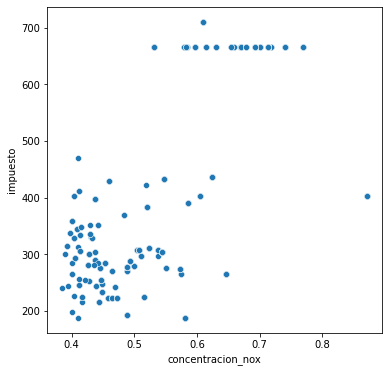

0.6680232004030221

In [ ]:
# Variables: "concentracion_nox", "impuesto" 
funcion_scatter("concentracion_nox", "impuesto", datos)
pearsonr(datos["concentracion_nox"], datos["impuesto"])[0]

En este caso suce lo mismo que se apreció en el caso anterior, no parece haber una relación entre ambas variables, lo que puede estar generando el alto coeficiente  de correlación es la presencia de valores extremos

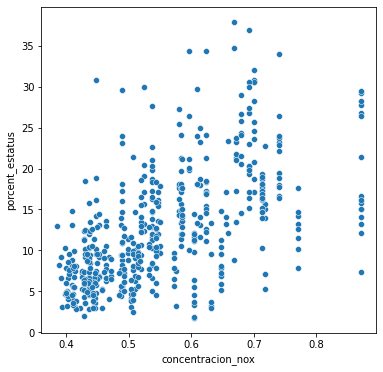

0.5908789208808461

In [ ]:
# Variables: "concentracion_nox", "porcent_estatus" 
funcion_scatter("concentracion_nox", "porcent_estatus", datos)
pearsonr(datos["concentracion_nox"], datos["porcent_estatus"])[0]

Para las variables concentracion_nox y porcent_estatus se observa una tendencia positiva entre ambas variables, aunque la relación no es fuerte y los puntos se encuentran muy dispersos entre sí.

### Variable "prom_cuartos"

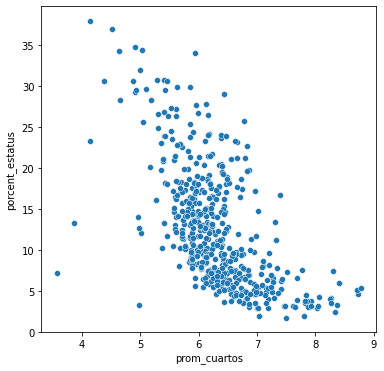

-0.6138082718663957

In [ ]:
# Variables: "prom_cuartos", "porcent_estatus" 
funcion_scatter("prom_cuartos", "porcent_estatus", datos)
pearsonr(datos["prom_cuartos"], datos["porcent_estatus"])[0]

Entre estas dos variables, prom_cuartos y porcent_estatus parece existir una relación sin embargo no parece ser de carácter lineal sino más bien cuadática.

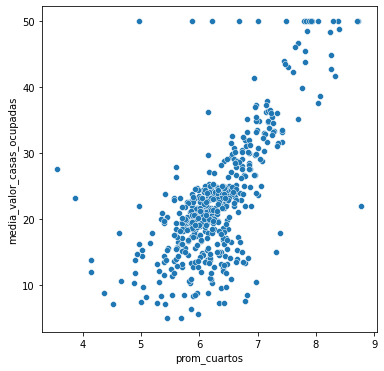

0.6953599470715394

In [ ]:
# Variables: "prom_cuartos", "media_valor_casas_ocupadas" 
funcion_scatter("prom_cuartos", "media_valor_casas_ocupadas", datos)
pearsonr(datos["prom_cuartos"], datos["media_valor_casas_ocupadas"])[0]

La relación es clara entre la cantidad de cuartos y el valor medio de las casas, lo cual tiene sentido ya que mientras mayor sea el número de cuartos en una casa, mayor será su valor.

### Variable "edad"

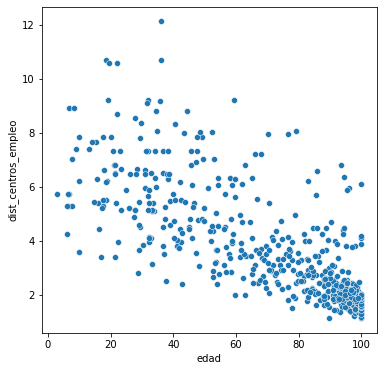

-0.7478805408686318

In [ ]:
# Variables: "edad", "dist_centros_empleo" 
funcion_scatter("edad", "dist_centros_empleo", datos)
pearsonr(datos["edad"], datos["dist_centros_empleo"])[0]

La distancia de las casas a los centros de empleo de Boston parece disminuir moderadamente a medida que aumenta la proporción de casas antiguas en la ciudad. Es posible que los centros de empleo de Boston estén ubicados en la ciudad, donde la proporción de unidades construidas antes de 1940 es comparativamente alta.

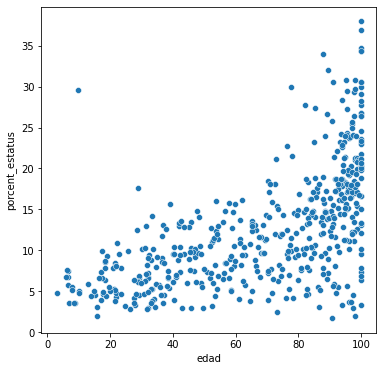

0.6023385287262398

In [ ]:
# Variables: "edad", "porcent_estatus" 
funcion_scatter("edad", "porcent_estatus", datos)
pearsonr(datos["edad"], datos["porcent_estatus"])[0]

Entre las variables edad y porcent_estatus parace existir una tendencia positiva, sin embargo, los puntos se van volviendo más dispersos mientras el valor de las variables se incrementa.

### Variable "impuesto"

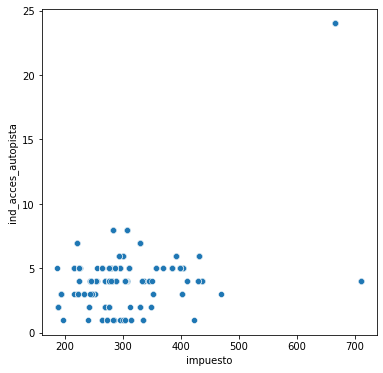

0.9102281885331868

In [ ]:
# Variables: "impuesto", "ind_acces_autopista" 
funcion_scatter("impuesto", "ind_acces_autopista", datos)
pearsonr(datos["impuesto"], datos["ind_acces_autopista"])[0]

Entre el impuesto y la variable ind_acces_autopista no existe una relación, el alto coeficiente de correlación en este caso se debe a los valores extremos que se encuentran en ambas variables.

### Variable "porcent_estatus"

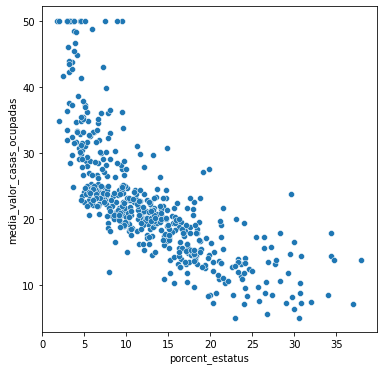

-0.737662726174015

In [ ]:
# Variables: "porcent_estatus", "media_valor_casas_ocupadas" 
funcion_scatter("porcent_estatus", "media_valor_casas_ocupadas", datos)
pearsonr(datos["porcent_estatus"], datos["media_valor_casas_ocupadas"])[0]

Del gráfico se aprecia una relación negativa entre porcent_estatus y media_valor_casas_ocupadas.

##Modelado

Dado que la variable independiente "media_valor_casas_ocupadas" está sesgada, se procede a aplicarle una transformación logarítmica

In [ ]:
datos_1 = datos.copy(deep = True)
datos_1["media_valor_casas_ocupadas"] = np.log(datos['media_valor_casas_ocupadas'])

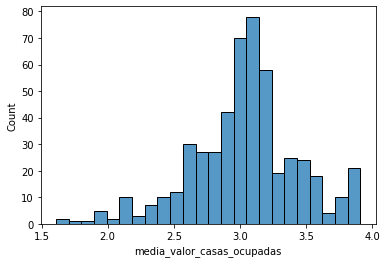

In [ ]:
sns.histplot(data = datos_1, x = "media_valor_casas_ocupadas")

Luego de aplicar la transformación, la distribución de la variable de salida se adapta mejor a una distribución normal.

Ahora, los datos se separan en las columnas de los features y la columna con la variable dependiente

In [ ]:
# Separación de los datos
datos1_features = datos_1.drop(["media_valor_casas_ocupadas"], axis = 1)
datos1_var_dependiente = datos_1["media_valor_casas_ocupadas"]

**Escalar los datos**


El siguiente paso para desarrollar el modelo es escalar los datos para evitar sesgos hacia alguna variable.

In [ ]:
# Se va a usar el escalador MinMax para evitar valores negativos en las varaibles 
escalador_min_max = MinMaxScaler()

# Se aplica el escalador a los datos de los features que se encuentran en el set "datos1_features"
datos1_features_escalados = escalador_min_max.fit_transform(datos1_features)

In [ ]:
# Formato de data frame a los datos escalados:  "datos1_features_escalados"

datos1_features_escalados = pd.DataFrame(datos1_features_escalados, index = datos1_features.index, columns = datos1_features.columns)
datos1_features_escalados.head()

,tasa_crimen,prop_zonif,prop_acres_non_retail,rio_charles,concentracion_nox,prom_cuartos,edad,dist_centros_empleo,ind_acces_autopista,impuesto,prop_maestro_alumno,porcent_estatus
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.099338


In [ ]:
# Según el modelo de Regresión Lineal, se requiere una  columna con una constante  en el set "datos1_features_escalados" para poder calcular el modelo
datos1_features_escalados = sm.add_constant(datos1_features_escalados)

Partición de los datos de entrenamiento para entrenamiento y prueba

In [ ]:
# Luego,  se  divide  el dataframe en dos secciones: 70%  para  entrenamiento  y 30% para prueba 
# Se usa el método de la librería de scikit-learn para la partición:
from sklearn.model_selection import train_test_split

# Partición del set "datos1_features_escalados" y "datos1_var_dependiente"
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(datos1_features_escalados, datos1_var_dependiente, test_size = 0.30 , random_state = 1)

**Análisis de los features**

Se analiza la importancia que tiene  cada feature para predecir la variable dependiente a través de su valor VIF, el cual permite medir si la varianza de la variable está incrementada debido a la existencia de correlación con otras. El otro criterio es  el p-value. 

In [ ]:
# Para obtener el VIF

def calculo_vif(datos_vif):
  vif = []
  
  for i in range(datos_vif.shape[1]):
    vif.append(variance_inflation_factor(datos_vif.values, i))
  return(vif)

In [ ]:
# VIF: modelo original
coeficientes_vif1 = pd.Series(calculo_vif(x_entrenamiento), index = x_entrenamiento.columns, dtype = float)
print("coeficientes VIF: \n\n{}\n".format(coeficientes_vif1))

coeficientes VIF: 

const                    90.058919
tasa_crimen               1.924114
prop_zonif                2.743574
prop_acres_non_retail     3.999538
rio_charles               1.076564
concentracion_nox         4.396157
prom_cuartos              1.860950
edad                      3.150170
dist_centros_empleo       4.355469
ind_acces_autopista       8.345247
impuesto                 10.191941
prop_maestro_alumno       1.943409
porcent_estatus           2.861881
dtype: float64



En el modelo inicial, los coeficientes VIF indican que las variables "ind_acces_autopista" e "impuesto" son las que pueden retirarse, sin embargo, se va a retirar primero "ind_acces_autopista" ya que su VIF es mayor, y se recalcula el modelo

Primero, se define una función para realizar este proceso más rápidamente

In [ ]:
def calculo_modelo_nuevo(feature_eliminar, features_restantes, variable_dependiente):

  # 1. Eliminar la variable con VIF alto
  features_restantes = features_restantes.drop(feature_eliminar, axis = 1)
  
  # Hacer el fit del modelo de regresión sobre los datos nuevos (aplicar algoritmo ols)
  modelo_ols_nuevo = sm.OLS(variable_dependiente, features_restantes)
  
  # Hacer el fitting del modelo
  modelo_nuevo = modelo_ols_nuevo.fit()

  #Se retorna: los nuevos features (los que quedan luego de eliminar la variable del VIF alto) y el modelo de regresión nuevo 
  return(features_restantes, modelo_nuevo)

### modelo 2: sin la variable "ind_acces_autopista"

In [ ]:
# Extrayendo la variable "ind_acces_autopista":
features_restantes_modelo2, modelo_2  = calculo_modelo_nuevo("ind_acces_autopista", x_entrenamiento, y_entrenamiento)

In [ ]:
print(modelo_2.summary())

                                OLS Regression Results                                
Dep. Variable:     media_valor_casas_ocupadas   R-squared:                       0.761
Model:                                    OLS   Adj. R-squared:                  0.753
Method:                         Least Squares   F-statistic:                     98.77
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):           4.62e-99
Time:                                16:23:55   Log-Likelihood:                 70.547
No. Observations:                         354   AIC:                            -117.1
Df Residuals:                             342   BIC:                            -70.66
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Ahora, de acuerdo al p-value de las distintas variables que se están empleando como predictoras, es posible eliminar del modelo la variable "edad", ya que su valor es superior al valor de 0.05, y en este caso, su p-value es el mayor al compararlo con las demás.

### modelo 3: sin la variable "edad"

In [ ]:
# Extrayendo la variable "edad":
features_restantes_modelo3, modelo_3  = calculo_modelo_nuevo("edad", features_restantes_modelo2, y_entrenamiento)

In [ ]:
print(modelo_3.summary())

                                OLS Regression Results                                
Dep. Variable:     media_valor_casas_ocupadas   R-squared:                       0.761
Model:                                    OLS   Adj. R-squared:                  0.754
Method:                         Least Squares   F-statistic:                     108.9
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          4.40e-100
Time:                                16:23:58   Log-Likelihood:                 70.524
No. Observations:                         354   AIC:                            -119.0
Df Residuals:                             343   BIC:                            -76.48
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Al correr el modelo 3, sin la variable edad, y comparar el R cuadrado con el R cuadrado ajustado, se observa que que el primero no cambia y el ajustado incrementa un poco. La siguiente variable que puede eliminarse es "prop_acres_non_retail" dado que su p-value es de 0.829, por lo que no es sgnificativa para el modelo.

### modelo 4: sin la variable "prop_acres_non_retail"

In [ ]:
# Extrayendo la variable "prop_acres_non_retail":
features_restantes_modelo4, modelo_4  = calculo_modelo_nuevo("prop_acres_non_retail", features_restantes_modelo3, y_entrenamiento)

In [ ]:
print(modelo_4.summary())

                                OLS Regression Results                                
Dep. Variable:     media_valor_casas_ocupadas   R-squared:                       0.761
Model:                                    OLS   Adj. R-squared:                  0.754
Method:                         Least Squares   F-statistic:                     121.4
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          3.97e-101
Time:                                16:24:09   Log-Likelihood:                 70.499
No. Observations:                         354   AIC:                            -121.0
Df Residuals:                             344   BIC:                            -82.31
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Este modelo, al compararlo con el anterior, no muestra cambios en las medidas de R cuadrado ni R cuadrado ajustado, esto indica que realmente las variables que se han eliminado hasta el momento no eran significativas como predictoras para el modelo. Continuamos con la eliminación de la variable "impuesto", cuyo p-value es de 0.189.

##Modelo Final seleccionado a partir de la eliminación de features

### modelo 5: sin la variable "impuesto"

In [ ]:
# Extrayendo la variable "impuesto":
features_restantes_modelo5, modelo_5  = calculo_modelo_nuevo("impuesto", features_restantes_modelo4, y_entrenamiento)

In [ ]:
print(modelo_5.summary())

                                OLS Regression Results                                
Dep. Variable:     media_valor_casas_ocupadas   R-squared:                       0.759
Model:                                    OLS   Adj. R-squared:                  0.754
Method:                         Least Squares   F-statistic:                     136.1
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          7.78e-102
Time:                                16:24:50   Log-Likelihood:                 69.610
No. Observations:                         354   AIC:                            -121.2
Df Residuals:                             345   BIC:                            -86.40
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

En este punto, al eliminar las variables cuyos p-values son mayores al alfa de 0.05, obtenemos un modelo cuyos coeficientes son significativos a excepción de la variable "prop_zonif", por lo que procedemos a eliminarla del modelo.

### modelo 6: sin la variable "prop_zonif"

In [ ]:
# Extrayendo la variable "prop_zonif":
features_restantes_modelo6, modelo_6  = calculo_modelo_nuevo("prop_zonif", features_restantes_modelo5, y_entrenamiento)

In [ ]:
print(modelo_6.summary())

                                OLS Regression Results                                
Dep. Variable:     media_valor_casas_ocupadas   R-squared:                       0.757
Model:                                    OLS   Adj. R-squared:                  0.752
Method:                         Least Squares   F-statistic:                     153.9
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          3.21e-102
Time:                                16:25:14   Log-Likelihood:                 67.888
No. Observations:                         354   AIC:                            -119.8
Df Residuals:                             346   BIC:                            -88.82
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Al analizar el summary se observa que, al compararlo con el del modelo anterior, el R cuadrado ajustado ha disminuido, esto no ocurrió al eliminar las otras variables, por lo que se elimina esta variable del modelo, y se selecciona el modelo 5 como modelo final en lugar del  modelo 6. De esta forma, el R cuadrado ajustado final del modelo es de 0.754

## Predictores seleccionados

Datos del modelo final

In [ ]:
x_entrenamiento_features  = features_restantes_modelo5
modelo_final = modelo_5

**Observaciones:**

Se eliminaron un total de 4 variables:

1. ind_acces_autopista"
2. edad
3. prop_acre_non_retail
4. impuesto

Lo que deja 8 variables predictoras en el modelo. 

## **Validación de supuestos**

1. Supuesto de No autocorrelación

In [ ]:
# Test de Durbin-Watson para determinar si existe  autocorrealación

from statsmodels.stats.stattools import durbin_watson as dwtest

residuos = modelo_final.resid
residuos_array = np.array(residuos)
round(dwtest(residuos),2)

1.97

Ya que el valor Durbin-Watson es prácticamente igual a  2, se asume que se cumple el supuesto de no autocorrelación entre los residuos.

2. Supuesto de normalidad

En este caso, podemos graficar un histograma de los residuos para determinar si estos siguen una distribución normal. 

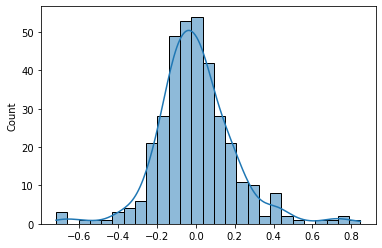

In [ ]:
sns.histplot(residuos, kde = True)

3. Supuesto de homocedasticidad

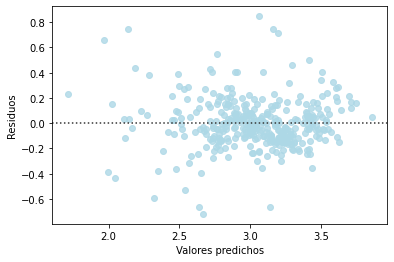

In [ ]:
# Graficamos los residuos contra los valores predichos

#Obtenemos los valores predichos del modelo con el que estamos trabajando
valores_predichos = modelo_final.fittedvalues

#Realizamos el gráfico
sns.residplot(x = valores_predichos, y = residuos, color = "lightblue")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.show()


En este caso, no parece haber un patrón que indique que la varianza de los residuos depende de x, por lo que puede asumirse que los residuos cumplen el supuesto de homocedasticidad.

4. Supuesto de linealidad



A partir de lo que se observa en el gráfico de residuos versus predichos sepuede asumir que  la relación entre estos cumple con el supuesto de linealidad. 

5. No multicolinealidad

In [ ]:
# Calculamos nuevamente el coeficiente VIF para el modelo

vif_coeficientes = pd.Series(calculo_vif(x_entrenamiento_features), index = x_entrenamiento_features.columns, dtype = float)
print("coeficientes VIF: \n\n{}\n".format(vif_coeficientes))

coeficientes VIF: 

const                  76.112440
tasa_crimen             1.485460
prop_zonif              2.416945
rio_charles             1.049498
concentracion_nox       2.895969
prom_cuartos            1.714308
dist_centros_empleo     3.721739
prop_maestro_alumno     1.447584
porcent_estatus         2.439282
dtype: float64



Los valores VIF para los features son todos menores a  4, por esta razón podemos asumir que el supuesto de no multicolinealidad se cumple.


## Evaluación del modelo

  Luego, se revisa el R cuadrado y el R cuadrado ajustado del modelo final con el que se está trabajando.

In [ ]:
modelo_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     media_valor_casas_ocupadas   R-squared:                       0.759
Model:                                    OLS   Adj. R-squared:                  0.754
Method:                         Least Squares   F-statistic:                     136.1
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          7.78e-102
Time:                                16:32:50   Log-Likelihood:                 69.610
No. Observations:                         354   AIC:                            -121.2
Df Residuals:                             345   BIC:                            -86.40
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.6533      0.093     39.129      0.000       3.470       3.837
tasa_crimen            -0.8699      0.136     -6.381      0.000      -1.138      -0.602
prop_zonif              0.1300      0.071      1.837      0.067      -0.009       0.269
rio_charles             0.1219      0.039      3.096      0.002       0.044       0.199
concentracion_nox      -0.3823      0.075     -5.090      0.000      -0.530      -0.235
prom_cuartos            0.3625      0.106      3.429      0.001       0.155       0.570
dist_centros_empleo    -0.5676      0.106     -5.336      0.000      -0.777      -0.358
prop_maestro_alumno    -0.3196      0.056     -5.661      0.000      -0.431      -0.209
porcent_estatus        -1.0625      0.083    -12.749      0.000      -1.226      -0.899
==============================================================================
Omnibus:                       44.330   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.464
Skew:                           0.509   Prob(JB):                     9.52e-33
Kurtosis:                       5.993   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo resultante tiene un R cuadrado y un R cuadrado ajustado muy similares entre sí, lo cual indica que el R cuadrado no está siendo inflado por predictores que no ayudan a explicar la variabilidad del modelo, y además, no se eliminaron features que tenían un alto poder predictivo. En cuanto a esto, el modelo logra explicar un 75.4% de la misma.

Datos finales para prueba

In [ ]:
# Generar dataframe, a partir de los datos de prueba,  con  las columnas de los predictores
x_prueba_features = x_prueba.filter(["const","tasa_crimen", "prop_zonif", "rio_charles", "concentracion_nox", 
                                             "prom_cuartos", "dist_centros_empleo", "prop_maestro_alumno","porcent_estatus"], axis=1).copy()
x_prueba_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 307 to 23
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                152 non-null    float64
 1   tasa_crimen          152 non-null    float64
 2   prop_zonif           152 non-null    float64
 3   rio_charles          152 non-null    float64
 4   concentracion_nox    152 non-null    float64
 5   prom_cuartos         152 non-null    float64
 6   dist_centros_empleo  152 non-null    float64
 7   prop_maestro_alumno  152 non-null    float64
 8   porcent_estatus      152 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [ ]:
x_entrenamiento_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 13 to 37
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                354 non-null    float64
 1   tasa_crimen          354 non-null    float64
 2   prop_zonif           354 non-null    float64
 3   rio_charles          354 non-null    float64
 4   concentracion_nox    354 non-null    float64
 5   prom_cuartos         354 non-null    float64
 6   dist_centros_empleo  354 non-null    float64
 7   prop_maestro_alumno  354 non-null    float64
 8   porcent_estatus      354 non-null    float64
dtypes: float64(9)
memory usage: 27.7 KB


## Predicciones sobre los datos de prueba


Al realizar las predicciones sobre los datos de prueba, se mide qué tan buena es esta a través del cálculo de distintas medidas de error.


In [ ]:
# Función para el cálculo del RMSE
def funcion_rmse(observado, predicciones):
    return np.sqrt(((observado - predicciones)**2).mean())

In [ ]:
# Función para el cálculo del  MAPE
def funcion_mape(observado, predicciones):
    return np.mean(np.abs((observado - predicciones)) / observado) * 100

In [ ]:
# Función para el cálculo del  MAE
def funcion_mae(observado, predicciones):
    return np.mean(np.abs((observado - predicciones)))

In [ ]:
def prediccion_modelo(modelo, x):
    # predicción sobre los datos de los features proporcionados
    y_predicho = modelo.predict(x)
    #y_entrenamiento
    return(y_predicho)

In [ ]:
#Error RMSE
rmse_entrenamiento = round(funcion_rmse(y_entrenamiento, prediccion_modelo(modelo_final, x_entrenamiento_features)),2)
rmse_prueba = round(funcion_rmse(y_prueba, prediccion_modelo(modelo_final, x_prueba_features)),2)

In [ ]:
#Error MAPE
mape_entrenamiento = round(funcion_mape(y_entrenamiento, prediccion_modelo(modelo_final, x_entrenamiento_features)),2)
mape_prueba = round(funcion_mape(y_prueba, prediccion_modelo(modelo_final, x_prueba_features)),2)

In [ ]:
#Error MAE
mae_entrenamiento = round(funcion_mae(y_entrenamiento, prediccion_modelo(modelo_final, x_entrenamiento_features)),2)
mae_prueba = round(funcion_mae(y_prueba, prediccion_modelo(modelo_final, x_prueba_features)),2)

In [ ]:
print(pd.DataFrame({"Datos": ["Entrenamieto", "Prueba"],"RMSE": [rmse_entrenamiento, rmse_prueba], "MAPE": [mape_entrenamiento, mape_prueba], "MAE": [mae_entrenamiento, mae_prueba]}))

          Datos  RMSE  MAPE   MAE
0  Entrenamieto  0.20  4.93  0.14
1        Prueba  0.19  4.99  0.14


Como se aprecia a partir de los parámetros para medir el error, según el MAPE, las predicciones del modelo se encuentran desfasadas de los valores reales en un 4.93% para el set de entrenamiento y en un 4.99% para el set de prueba, por lo que puede esperarse  que el comportamiento  del modelo en los datos reales no varíe mucho del observado en estos datos, lo que ofrece predicciones muy cercanas a la realidad, lo cual es reforzado por el RMSE que indica que en promedio la distancia de los datos predichos con respecto a los datos reales es de 0.20 para los datos de entrenamiento y de 0.19 para los de prueba.  

Ahora, la ecuación del modelo es:

**log(media_valor_casas_ocupadas)** = 3.65 - 0.87 * **tasa_crimen** + 0.13 * **prop_zonif** + 0.12 * **rio_charles** - 0.38 * **concentracion_nox** + 0.36 * **prom_cuartos** - 0.57 * **dist_centros_empleo** - 0.32 * **prop_maestro_alumno** - 1.06 **porcent_estatus**

A partir de la ecuación se puede concluir que la mayoría de variables predictoras tienen un efecto de disminución en el logaritmo del valor medio de las casas, las variables que causan este efecto son:

1. La criminalidad (tasa_crimen)
2. La concentración de óxidos nítricos: (concentracion_nox)
3. La distancia ponderada a 5 centros de empleo (dis_centros_empleo)
4. La proporción de alumnos-maestro (prop_maestro_alumno)
5. El porcentaje de la población de un estatus más bajo (porcent_estatus)

De estas cinco variables, la que genera una mayor disminución es "porcent_estatus", y si recordamos de la sección de análisis bivariado, al graficar la relación entre ambos, había una fuerte correlación negativa entre ambas.

Por otro lado, las variables cuyo efecto incrementa el logaritmo de la variable dependiente son únicamente 3, además de la constante:

1. La proporción de área residencial zonificado para lotes superiores a 25,000 pies cuadrados (prop_zonif)

2. La cercanía al Río Charles.

3. La cantidad promedio de cuartos (prom_cuartos)

Aunque estas variables son positivas, es necesario tener en cuenta que su coeficiente es inferior a 1, por lo que reducen la variable a la que multiplican.


De esto se puede decir que para incrementar el precio que se espera obtener por una casa en esta área es necesario que la misma se encuentre en áreas residenciales nuevas con amplios espacios para contruir residencias, mientras mayor sea la cantidad de cuartos mejor será el precio y su cercanía al río Charles también ayuda a elevarlo. 